In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filter('ignore')

AttributeError: module 'warnings' has no attribute 'filter'

In [2]:
net = pd.read_csv('datasets\\Internet-Demographic.csv')

In [3]:
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [5]:
net.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


<h1> Insight No.1 </h1>

<h1> Distribution of Birth Rates </h1>

In [7]:
net['Birth rate'].mean()

np.float64(21.469928205128202)

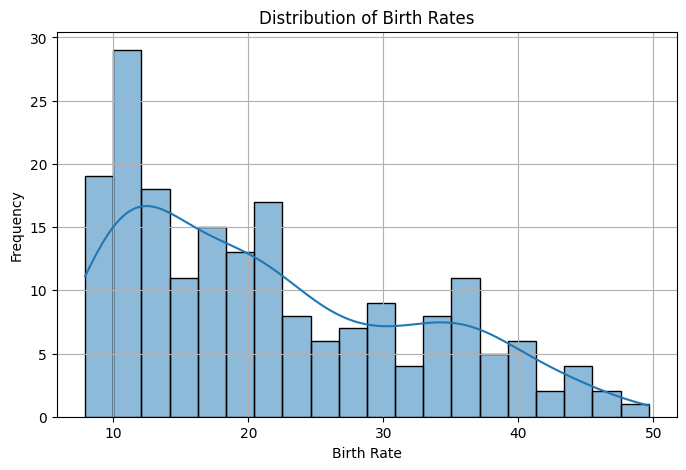

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(net['Birth rate'], bins=20, kde=True)
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Rates')
plt.grid(True)
plt.show()

<h1> Insight No.2 </h1>

<h1>Top 5 Countries with the Highest Internet Usage</h1>

In [15]:
top5 = net.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]
display(top5)

,Country Name,Internet users
84,Iceland,96.5468
22,Bermuda,95.3000
131,Norway,95.0534
163,Sweden,94.7836
47,Denmark,94.6297


<h1>Insight No.3</h1>

<h1>Count of Countries by Income Group</h1>

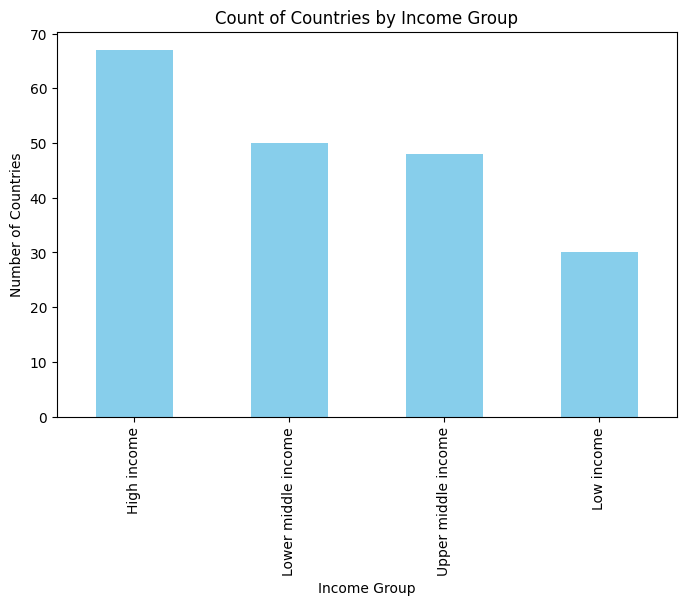

In [31]:
income_counts = net['Income Group'].value_counts()
income_counts.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Count of Countries by Income Group')
plt.show()

<h1>Insight No.4 </h1>

<h1>Box Plot of Internet Usage</h1>

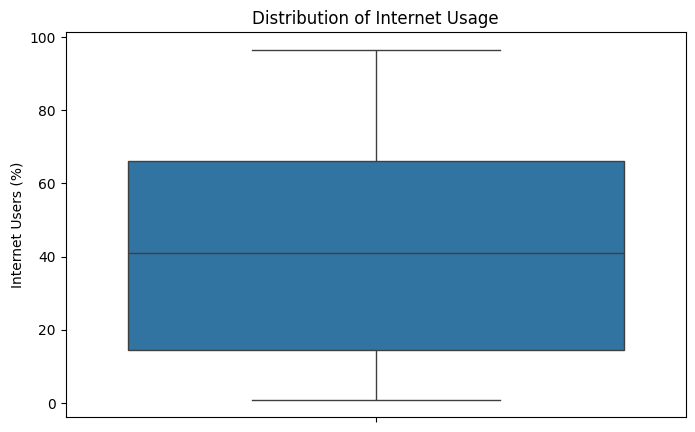

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(y=net['Internet users'])
plt.ylabel('Internet Users (%)')
plt.title('Distribution of Internet Usage')
plt.show()

<h1>Insight No.5</h1>

<h1>Countries with No Internet Access</h1>

In [36]:
no_internet = net[net['Internet users'] == 0]['Country Name']
display(no_internet)


Series([], Name: Country Name, dtype: object)

<h1>Insight No.6</h1>

<h1>Average Birth Rate</h1>

In [23]:
avg_birth_rate = net['Birth rate'].mean()
print(f'Average Birth Rate: {avg_birth_rate:.2f}')

Average Birth Rate: 21.47


<h1>Insight No.7</h1>

<h1>Scatter Plot: Birth Rate vs Internet Usage</h1>

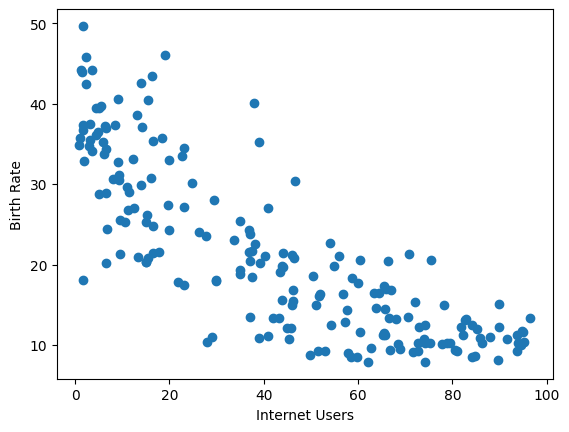

In [32]:
plt.scatter(net['Internet users'], net['Birth rate'])
plt.xlabel('Internet Users')
plt.ylabel('Birth Rate')
plt.show()

<h1>Insight No.8</h1>

<h1>Countries with Birth Rates Above 40</h1>

In [26]:
high_birth_rate = net[net['Birth rate'] > 40][['Country Name', 'Birth rate']]
display(high_birth_rate)

,Country Name,Birth rate
2,Angola,45.985
11,Burundi,44.151
14,Burkina Faso,40.551
65,"Gambia, The",42.525
115,Mali,44.138
127,Niger,49.661
128,Nigeria,40.045
156,Somalia,43.891
167,Chad,45.745
178,Uganda,43.474


<h1> Insight No.9 </h1>

<h1>Pie Chart of Income Groups</h1>

In [28]:
net.groupby(['Income Group']).size()

Income Group
High income            67
Low income             30
Lower middle income    50
Upper middle income    48
dtype: int64

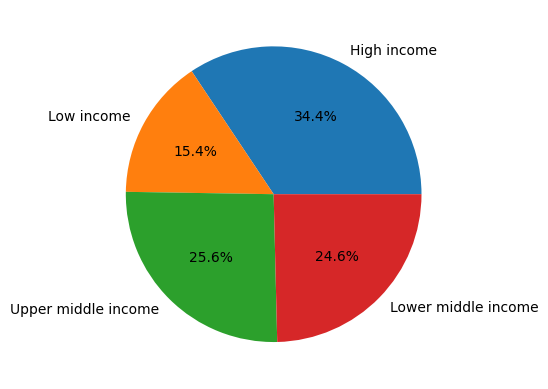

In [27]:
income = net.groupby(['Income Group']).size()

plt.pie(income, autopct = '%1.1f%%', labels=net['Income Group'].unique())
plt.show()

<h1>Insight No.10</h1>

<h1>Correlation Between Birth Rate and Internet Usage</h1>

In [33]:
correlation = net['Birth rate'].corr(net['Internet users'])
print(f'Correlation between Birth Rate and Internet Users: {correlation:.2f}')
if correlation > 0.5:
    print("Strong positive correlation")
elif correlation < -0.5:
    print("Strong negative correlation")
else:
    print("Weak or no correlation")

Correlation between Birth Rate and Internet Users: -0.82
Strong negative correlation
